In [23]:
import networkx as nx
import numpy as np
import seaborn as sns
import sys
sys.setrecursionlimit(10000)
%matplotlib inline

In [96]:
G = nx.barabasi_albert_graph(10, 2)

In [97]:
L = nx.laplacian_matrix(G, nodelist=sorted(G.nodes())).toarray()

In [98]:
# Commute-time kernel

K = np.linalg.pinv(L)

In [99]:
def normalize(K):
    """
    Compute the cosine of the matrix and normalize matrix diagonals to 1. See Fouss, 2012, Neural Networks
    """
    D = np.diag(1 / np.sqrt(np.diag(K)))
    K = D @ K @ D
    return K

In [100]:
K = normalize(K)

/Users/harry/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


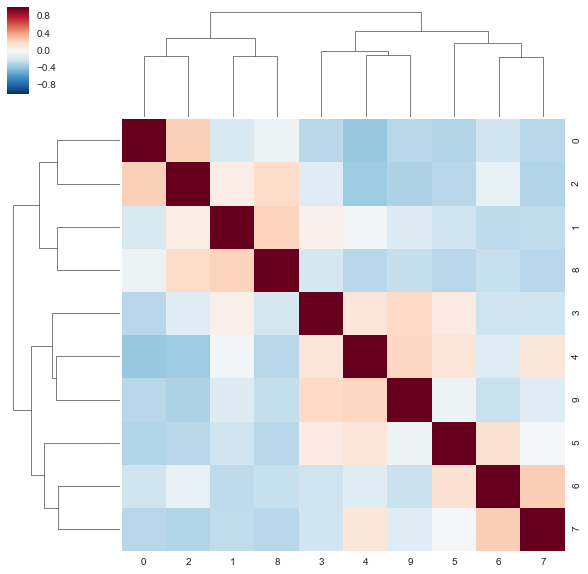

In [101]:
# cluster

sns.clustermap(K)